In [1]:
import numpy as np
import pandas as pd

# Cosine Similarity
\begin{align}
Cosine(x,y)= \frac{\sum_{i = 1}^{n}x_i y_i
}{\sqrt{\sum_{i=1}^{n}x_i^2} \sqrt{\sum_{i=1}^{n}y_i^2}}
\end{align}


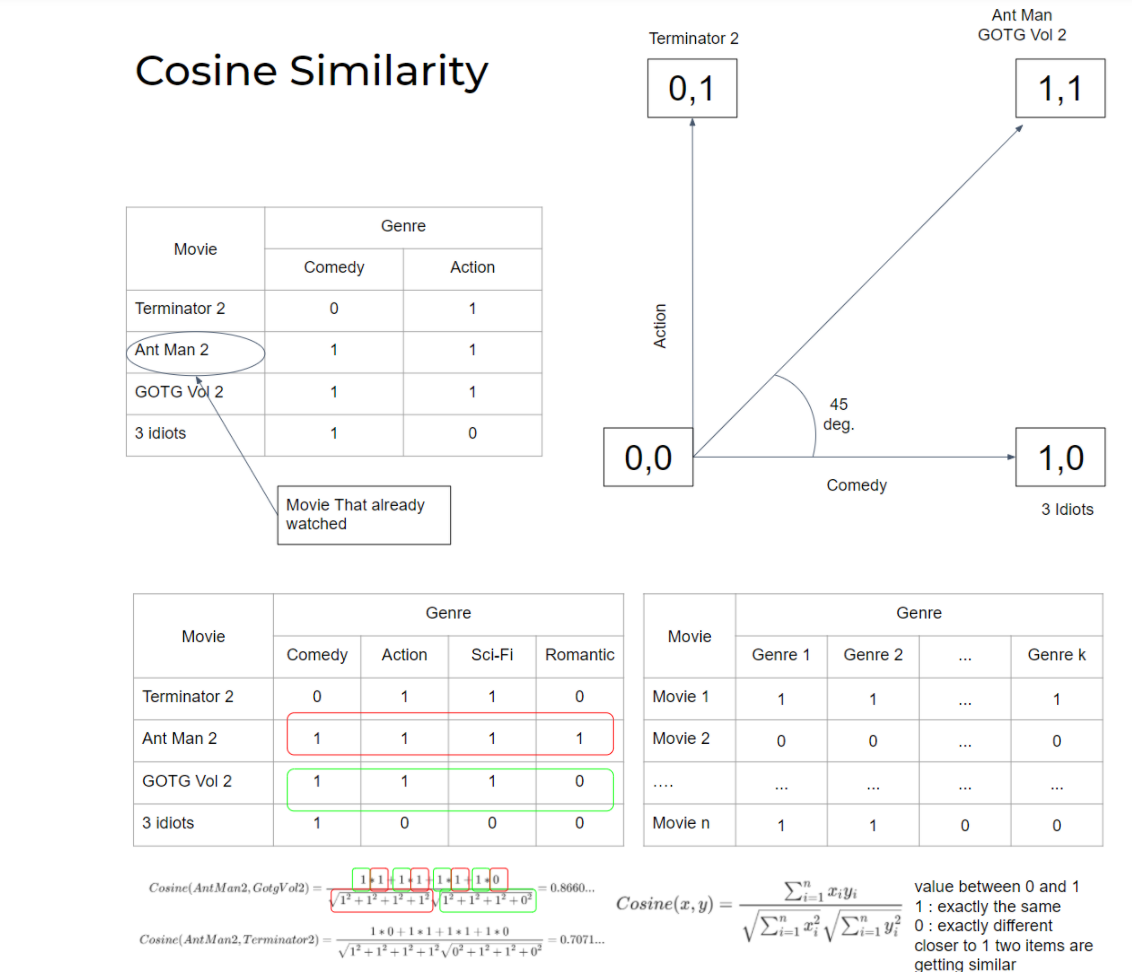

# Understanding Content Based Filtering using `Simple Dataset`

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Import Data

In [3]:
df = pd.DataFrame([
    {'title': 'A', 'genre': 'Pop', 'penyanyi': 'Andi'},
    {'title': 'B', 'genre': 'Keroncong', 'penyanyi': 'Andi'},
    {'title': 'C', 'genre': 'Dangdut', 'penyanyi': 'Andi'},
    {'title': 'D', 'genre': 'Pop', 'penyanyi': 'Budi'},
    {'title': 'E', 'genre': 'Keroncong', 'penyanyi': 'Budi'},
    {'title': 'F', 'genre': 'Dangdut', 'penyanyi': 'Budi'},
    {'title': 'G', 'genre': 'Pop', 'penyanyi': 'Caca'},
    {'title': 'H', 'genre': 'Keroncong', 'penyanyi': 'Caca'},
    {'title': 'I', 'genre': 'Dangdut', 'penyanyi': 'Caca'},
    {'title': 'J', 'genre': 'Pop', 'penyanyi': 'Caca'},
])

df


,title,genre,penyanyi
0,A,Pop,Andi
1,B,Keroncong,Andi
2,C,Dangdut,Andi
3,D,Pop,Budi
4,E,Keroncong,Budi
5,F,Dangdut,Budi
6,G,Pop,Caca
7,H,Keroncong,Caca
8,I,Dangdut,Caca
9,J,Pop,Caca


### Processing

In [4]:
cv = CountVectorizer()
cv.fit(df['genre'])

cv.vocabulary_

{'pop': 2, 'keroncong': 1, 'dangdut': 0}

In [6]:
ngenre = cv.transform(df['genre'])
cv.get_feature_names()

['dangdut', 'keroncong', 'pop']

In [9]:
df_cv = pd.concat([df, pd.DataFrame(ngenre.toarray(), columns=cv.get_feature_names())], axis=1)
df_cv

,title,genre,penyanyi,dangdut,keroncong,pop
0,A,Pop,Andi,0,0,1
1,B,Keroncong,Andi,0,1,0
2,C,Dangdut,Andi,1,0,0
3,D,Pop,Budi,0,0,1
4,E,Keroncong,Budi,0,1,0
5,F,Dangdut,Budi,1,0,0
6,G,Pop,Caca,0,0,1
7,H,Keroncong,Caca,0,1,0
8,I,Dangdut,Caca,1,0,0
9,J,Pop,Caca,0,0,1


In [10]:
cos_score = cosine_similarity(ngenre)
pd.DataFrame(cos_score, index=df['genre'], columns=df['genre'])

genre,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop
genre,,,,,,,,,,
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
df

,title,genre,penyanyi
0,A,Pop,Andi
1,B,Keroncong,Andi
2,C,Dangdut,Andi
3,D,Pop,Budi
4,E,Keroncong,Budi
5,F,Dangdut,Budi
6,G,Pop,Caca
7,H,Keroncong,Caca
8,I,Dangdut,Caca
9,J,Pop,Caca


In [12]:
last_played = int(input('Musik terakhir yang didengar?')) # index

music_recom = list(enumerate(cos_score[last_played]))
music_recom

Musik terakhir yang didengar?1


[(0, 0.0),
 (1, 1.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.0),
 (6, 0.0),
 (7, 1.0),
 (8, 0.0),
 (9, 0.0)]

In [13]:
your_recom = sorted(music_recom, key=lambda x: x[1], reverse=True)
your_recom

[(1, 1.0),
 (4, 1.0),
 (7, 1.0),
 (0, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [14]:
for i in your_recom[:5]:
    print(df.iloc[i[0]])

title               B
genre       Keroncong
penyanyi         Andi
Name: 1, dtype: object
title               E
genre       Keroncong
penyanyi         Budi
Name: 4, dtype: object
title               H
genre       Keroncong
penyanyi         Caca
Name: 7, dtype: object
title          A
genre        Pop
penyanyi    Andi
Name: 0, dtype: object
title             C
genre       Dangdut
penyanyi       Andi
Name: 2, dtype: object


# Anime Recommendation

In [15]:
anime = pd.read_csv('data/Data/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [16]:
anime.shape

(12294, 7)

In [17]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [18]:
anime = anime.iloc[:850]
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

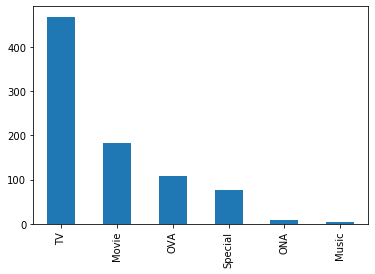

In [21]:
anime['type'].value_counts().plot(kind='bar');

In [22]:
anime['genre'].value_counts()

Adventure, Comedy, Mystery, Police, Shounen                           17
Comedy, School, Slice of Life                                         15
Comedy, School, Shounen, Sports                                       10
Comedy, Drama, Shounen, Sports                                        10
Action, Drama, Mecha, Military, Sci-Fi, Space                          9
                                                                      ..
Comedy, Drama, Fantasy                                                 1
Action, Drama, Historical                                              1
Demons, Fantasy, Historical, Horror, Mystery, Seinen, Supernatural     1
Comedy, Drama, Mystery, Psychological                                  1
Action, Mecha, Military, Super Power                                   1
Name: genre, Length: 517, dtype: int64

### Create Recommender System

In [23]:
cvr = CountVectorizer(tokenizer=lambda x: x.split(', '))

ngenre = cvr.fit_transform(anime['genre'])

ngenre.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
ngenre.shape

(850, 40)

In [26]:
print(len(cvr.get_feature_names()))
print(cvr.get_feature_names())

40
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire']


In [27]:
cos_score_anime = cosine_similarity(ngenre)
cos_score_anime

array([[1.        , 0.18898224, 0.        , ..., 0.4472136 , 0.        ,
        0.40824829],
       [0.18898224, 1.        , 0.28571429, ..., 0.16903085, 0.        ,
        0.3086067 ],
       [0.        , 0.28571429, 1.        , ..., 0.3380617 , 0.26726124,
        0.15430335],
       ...,
       [0.4472136 , 0.16903085, 0.3380617 , ..., 1.        , 0.        ,
        0.18257419],
       [0.        , 0.        , 0.26726124, ..., 0.        , 1.        ,
        0.28867513],
       [0.40824829, 0.3086067 , 0.15430335, ..., 0.18257419, 0.28867513,
        1.        ]])

In [30]:
cos_score_anime_df = pd.DataFrame(cos_score_anime, columns=anime['name'], index=anime['name'])
cos_score_anime_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Mobile Suit Gundam: Char&#039;s Counterattack,Naruto,New Game!,Shigatsu wa Kimi no Uso: Moments,Top wo Nerae 2! Diebuster,Baka to Test to Shoukanjuu: Matsuri,Blood+,Chrno Crusade,Free!: FrFr - Short Movie,Fruits Basket
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.223607,0.000000,0.000000,0.000000,0.000000,0.288675,0.377964,0.447214,0.000000,0.408248
Fullmetal Alchemist: Brotherhood,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.338062,0.338062,0.000000,0.267261,0.169031,0.000000,0.428571,0.169031,0.000000,0.308607
Gintama°,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
Steins;Gate,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.316228,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000
Gintama&#039;,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baka to Test to Shoukanjuu: Matsuri,0.288675,0.000000,0.218218,0.000000,0.218218,0.516398,0.288675,0.000000,0.218218,0.218218,...,0.000000,0.516398,0.408248,0.000000,0.258199,1.000000,0.000000,0.000000,0.408248,0.235702
Blood+,0.377964,0.428571,0.142857,0.000000,0.142857,0.169031,0.188982,0.377964,0.142857,0.142857,...,0.338062,0.169031,0.000000,0.000000,0.169031,0.000000,1.000000,0.338062,0.000000,0.154303
Chrno Crusade,0.447214,0.169031,0.338062,0.000000,0.338062,0.000000,0.223607,0.000000,0.338062,0.338062,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.338062,1.000000,0.000000,0.182574


In [33]:
cos_score_anime_df['Naruto'].sort_values(ascending=False).head(15)

name
Naruto                                        1.000000
Boruto: Naruto the Movie                      1.000000
Naruto: Shippuuden                            1.000000
Katekyo Hitman Reborn!                        0.894427
Dragon Ball Kai (2014)                        0.845154
Dragon Ball Kai                               0.845154
Dragon Ball Z                                 0.845154
Naruto: Shippuuden Movie 6 - Road to Ninja    0.800000
The Last: Naruto the Movie                    0.800000
Shijou Saikyou no Deshi Kenichi               0.800000
Bleach                                        0.800000
Shijou Saikyou no Deshi Kenichi OVA           0.800000
Boku no Hero Academia                         0.800000
One Piece Film: Strong World Episode 0        0.730297
Dragon Ball                                   0.730297
Name: Naruto, dtype: float64

In [40]:
anime_like = input('Anime yang Anda suka: ')
index_suka = anime[anime['name'] == anime_like].index[0]
anime_recom = list(enumerate(cos_score_anime[index_suka]))
anime_recom_sorted = sorted(anime_recom, key=lambda x: x[1], reverse=True)
anime_recom_sorted[1:11]

Anime yang Anda suka: Bleach


[(175, 0.8944271909999159),
 (178, 0.7999999999999999),
 (486, 0.7999999999999999),
 (615, 0.7999999999999999),
 (841, 0.7999999999999999),
 (478, 0.7745966692414834),
 (611, 0.7745966692414834),
 (814, 0.7745966692414834),
 (76, 0.7302967433402215),
 (182, 0.7302967433402215)]

In [46]:
for i in anime_recom_sorted[1:20]:
    index_anime = i[0]
    anime_score = round(i[1] * 100, 2)
    print(f"'{anime.loc[index_anime, 'name']}' with score: {anime_score}%")

'Katekyo Hitman Reborn!' with score: 89.44%
'Boku no Hero Academia' with score: 80.0%
'Boruto: Naruto the Movie' with score: 80.0%
'Naruto: Shippuuden' with score: 80.0%
'Naruto' with score: 80.0%
'Durarara!! Specials' with score: 77.46%
'K: Missing Kings' with score: 77.46%
'K: Return of Kings' with score: 77.46%
'JoJo no Kimyou na Bouken: Diamond wa Kudakenai' with score: 73.03%
'Saint Seiya: The Lost Canvas - Meiou Shinwa 2' with score: 73.03%
'Saint Seiya: The Lost Canvas - Meiou Shinwa' with score: 73.03%
'One Piece Film: Strong World Episode 0' with score: 73.03%
'Soul Eater' with score: 73.03%
'Beelzebub' with score: 73.03%
'One Piece: Episode of Luffy - Hand Island no Bouken' with score: 73.03%
'Shaman King' with score: 73.03%
'One Punch Man' with score: 67.61%
'One Piece' with score: 67.61%
'Dragon Ball Z' with score: 67.61%


# Collaborative Filtering

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [50]:
df = pd.read_csv('data/Data/Movie_file.tsv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [51]:
df[df['user_id'] == 0]

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [52]:
movie = pd.read_csv('data/Data/Movie_Id_Titles.csv')
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [55]:
movie[movie['item_id'] == 133]

,item_id,title
132,133,Gone with the Wind (1939)


In [56]:
data = pd.merge(df, movie, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [57]:
data[data['item_id'] == 50]

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
579,749,50,5,878846978,Star Wars (1977)
580,886,50,5,876031501,Star Wars (1977)
581,739,50,4,886958895,Star Wars (1977)
582,903,50,5,891031329,Star Wars (1977)


In [69]:
x = data.groupby('title')['rating'].count().sort_values(ascending=False)
x

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [71]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [72]:
ratings

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6
